In [57]:
import numpy as np
import pandas as pd
import scipy as sp
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn import linear_model
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn import metrics

In [58]:
insurance =  pd.read_csv("insurance.csv")

In [59]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


In [60]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [10]:
def map_smokers(column):
    mapped = []
    
    for row in column:
        if row == 'yes':
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped

In [11]:
insurance["smokers_norm"] = map_smokers(insurance['smoker'])

In [12]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,smokers_norm
0,19,female,27.900,0,yes,southwest,16884.92400,1
1,18,male,33.770,1,no,southeast,1725.55230,0
2,28,male,33.000,3,no,southeast,4449.46200,0
3,33,male,22.705,0,no,northwest,21984.47061,0
4,32,male,28.880,0,no,northwest,3866.85520,0


In [13]:
def map_bmi(column):
    mapped = []
    
    for row in column:
        if row > 30:
            mapped.append(1)
        else:
            mapped.append(0)
    return mapped

In [16]:
insurance["obese"] = map_bmi(insurance['bmi'])

In [17]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,smokers_norm,obese
0,19,female,27.900,0,yes,southwest,16884.92400,1,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0
4,32,male,28.880,0,no,northwest,3866.85520,0,0


In [20]:
def map_sex(column):
    mapped=[]
    for value in column:
        if value=="female":
            mapped.append(0)
        else:
            mapped.append(1)
    return mapped
insurance["sex_norm"]=map_sex(insurance["sex"])

In [21]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges,smokers_norm,obese,sex_norm
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1
3,33,male,22.705,0,no,northwest,21984.47061,0,0,1
4,32,male,28.880,0,no,northwest,3866.85520,0,0,1


In [22]:
insurance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 10 columns):
age             1338 non-null int64
sex             1338 non-null object
bmi             1338 non-null float64
children        1338 non-null int64
smoker          1338 non-null object
region          1338 non-null object
charges         1338 non-null float64
smokers_norm    1338 non-null int64
obese           1338 non-null int64
sex_norm        1338 non-null int64
dtypes: float64(2), int64(5), object(3)
memory usage: 104.6+ KB


In [23]:
insurance.describe()

,age,bmi,children,charges,smokers_norm,obese,sex_norm
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265,0.204783,0.526906,0.505232
std,14.049960,6.098187,1.205493,12110.011237,0.403694,0.499462,0.500160
min,18.000000,15.960000,0.000000,1121.873900,0.000000,0.000000,0.000000
25%,27.000000,26.296250,0.000000,4740.287150,0.000000,0.000000,0.000000
50%,39.000000,30.400000,1.000000,9382.033000,0.000000,1.000000,1.000000
75%,51.000000,34.693750,2.000000,16639.912515,0.000000,1.000000,1.000000
max,64.000000,53.130000,5.000000,63770.428010,1.000000,1.000000,1.000000


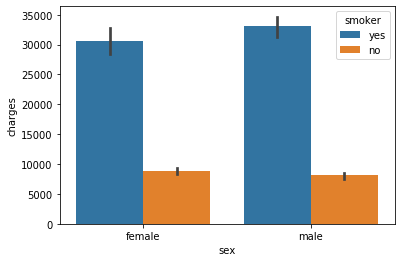

In [28]:

sns.barplot(x='sex', y='charges',data=insurance, hue='smoker')

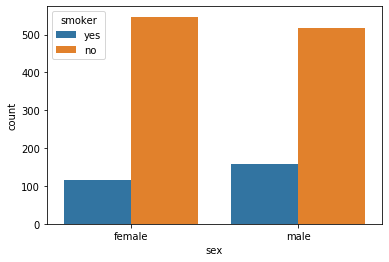

In [32]:
sns.countplot(x='sex',data=insurance, hue='smoker')

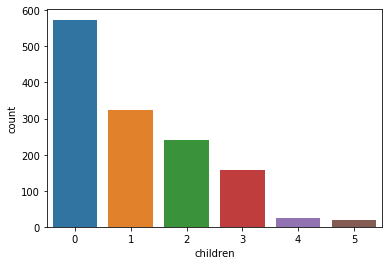

In [33]:
sns.countplot(x="children", data=insurance)

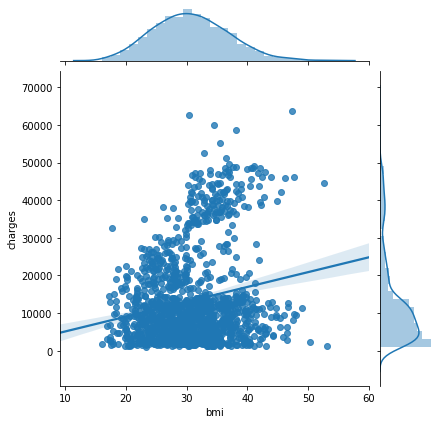

In [35]:
sns.jointplot(x = "bmi", y = "charges", data= insurance, kind="reg")

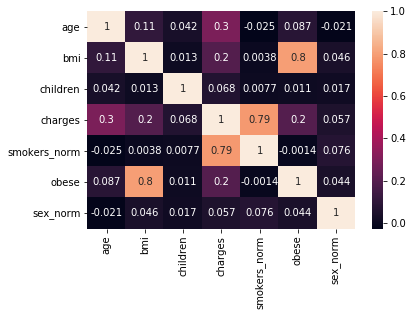

In [39]:
sns.heatmap(insurance.corr(), annot= True)

In [41]:
X = insurance[['age', 'bmi', 'children','smokers_norm', 'obese']]
y = insurance['charges']

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101)

In [44]:
X_train.head()

,age,bmi,children,smokers_norm,obese
612,18,33.155,0,0,1
65,19,28.900,0,0,0
42,41,21.780,1,0,0
533,37,36.190,0,0,1
586,21,20.235,3,0,0


In [45]:
lm = linear_model.LinearRegression()

In [46]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
print(lm.intercept_)

-6569.117523023093


In [48]:
lm.coef_

array([  241.39461251,    90.26053022,   537.54489467, 23418.33376791,
        4166.66138097])

In [49]:
predictions = lm.predict(X_test)

Text(0, 0.5, 'predictions')

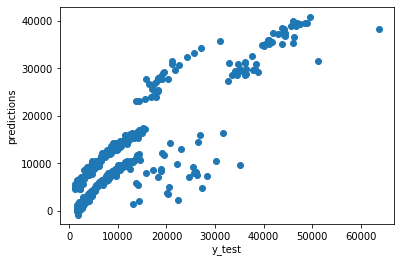

In [50]:
plt.scatter(y_test,predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')

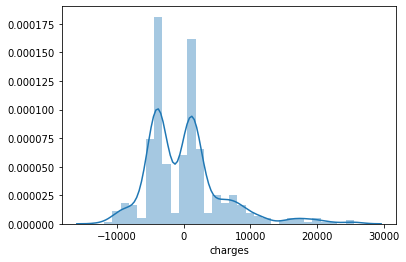

In [51]:
sns.distplot(y_test-predictions,bins=30);

In [54]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 4244.4865180564075
MSE: 33540220.023688883
RMSE: 5791.391890011319


In [55]:
def calculate_insurance(age,obesity,smoking,inter,cof ):
    age_c = cof[0]
    bmi_c = cof[2]
    smoker_c = cof[4]
    return (age_c*age)+(bmi_c*obesity)+(smoker_c*smoking)+inter

In [56]:
bmi = [25,30,35,40,45,50,60]
age = 50
smoker = 1
insurance=[]
for value in bmi:
    print('For BMI',value,'Insurance will be:',
          calculate_insurance(age,value,smoker,lm.intercept_,lm.coef_))

For BMI 25 Insurance will be: 23105.8968501789
For BMI 30 Insurance will be: 25793.621323548323
For BMI 35 Insurance will be: 28481.345796917747
For BMI 40 Insurance will be: 31169.07027028717
For BMI 45 Insurance will be: 33856.794743656596
For BMI 50 Insurance will be: 36544.51921702602
For BMI 60 Insurance will be: 41919.96816376486
